Onboarding Day2 NYC High School Directory Analysis

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("/Users/cynthiaraghavan/Downloads/high-school-directory.csv")

df.head()

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,Council District,Census Tract,BIN,BBL,NTA,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,...,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater ...,20529.0,51,3,47,59
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,18181.0,69,2,49,52
3,08X305,Pablo Neruda Academy,Bronx,X450,718-824-1682,718-824-1663,9.0,12,NaN,NaN,...,18.0,16.0,2022205.0,2.036040e+09,Soundview-Castle Hill-Clason Point-Harding Par...,11611.0,58,5,31,26
4,03M485,Fiorello H. LaGuardia High School of Music & A...,Manhattan,M485,212-496-0700,212-724-5748,9.0,12,NaN,NaN,...,6.0,151.0,1030341.0,1.011560e+09,Lincoln Square ...,12420.0,20,4,19,12


Q: Clean column names (lowercase, replace spaces with underscores & remove special characters)

In [10]:
df.columns = (df.columns
      .str.lower()                                 # lowercase
      .str.replace(' ', '_')                       # replace spaces with underscores
      .str.replace(r'[^a-z0-9_]', '', regex=True)  # remove all special characters
)

In [12]:
df.columns

Index(['dbn', 'school_name', 'borough', 'building_code', 'phone_number',
       'fax_number', 'grade_span_min', 'grade_span_max', 'expgrade_span_min',
       'expgrade_span_max', 'bus', 'subway', 'primary_address_line_1', 'city',
       'state_code', 'postcode', 'website', 'total_students', 'campus_name',
       'school_type', 'overview_paragraph', 'program_highlights',
       'language_classes', 'advancedplacement_courses', 'online_ap_courses',
       'online_language_courses', 'extracurricular_activities',
       'psal_sports_boys', 'psal_sports_girls', 'psal_sports_coed',
       'school_sports', 'partner_cbo', 'partner_hospital', 'partner_highered',
       'partner_cultural', 'partner_nonprofit', 'partner_corporate',
       'partner_financial', 'partner_other', 'addtl_info1', 'addtl_info2',
       'start_time', 'end_time', 'se_services', 'ell_programs',
       'school_accessibility_description', 'number_programs', 'priority01',
       'priority02', 'priority03', 'priority04', 'prior

Filtering the Dataset

Brooklyn Schools

Q: Filter the dataset to include only schools located in Brooklyn.

In [14]:
df_brooklyn = df[df['borough'] == 'Brooklyn']
df_brooklyn.head()

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,council_district,census_tract,bin,bbl,nta,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,18181.0,69,2,49,52
7,17K122,Pathways in Technology Early College High Scho...,Brooklyn,K625,718-221-1593,718-221-1781,9.0,12,9.0,14.0,...,36.0,311.0,3030553.0,3.012160e+09,Crown Heights North ...,17615.0,16,2,49,49
10,23K644,Eagle Academy for Young Men II,Brooklyn,K271,718-495-0863,718-732-2129,6.0,12,NaN,NaN,...,41.0,301.0,3042157.0,3.015500e+09,Ocean Hill ...,13516.0,55,2,17,46
12,15K462,Secondary School for Law,Brooklyn,K460,718-832-4250,718-499-3947,9.0,12,NaN,NaN,...,39.0,155.0,3025510.0,3.010820e+09,Park Slope-Gowanus ...,17617.0,14,2,27,50


Q: Unique Schools in Brooklyn (unique identifier 'dbn' column)

In [15]:
unique_schools_brooklyn = df_brooklyn['dbn'].nunique()
print(f"Total unique schools in Brooklyn: {unique_schools_brooklyn}")

Total unique schools in Brooklyn: 121


Q: How many schools in Brooklyn offer Grade 9 entry? 

In [16]:
brooklyn_schools_grade9 = df_brooklyn[
    (df_brooklyn['grade_span_min'] <= 9) & (df_brooklyn['grade_span_max'] >= 9)
    ]

brooklyn_schools_grade9_count = brooklyn_schools_grade9['dbn'].nunique()
brooklyn_schools_grade9_count

121

Answer: All 121 schools in Brooklyn offer grade 9.

Group and Summarize

Q: Count of schools per borough (again unique schools)

In [17]:
df.groupby('borough')['dbn'].nunique()

borough
Bronx            118
Brooklyn         121
Manhattan        106
Queens            80
Staten Island     10
Name: dbn, dtype: int64

Q: Average number of students per borough

In [18]:
df.groupby('borough')['total_students'].mean().round(2)

borough
Bronx             490.41
Brooklyn          699.13
Manhattan         589.83
Queens           1046.64
Staten Island    1847.50
Name: total_students, dtype: float64

Q: Summary of grade_span_max grouped by borough

In [19]:
df.groupby('borough')['grade_span_max'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
borough,,,,,,,,
Bronx,118.0,11.91,0.37,9.0,12.0,12.0,12.0,12.0
Brooklyn,121.0,11.93,0.38,9.0,12.0,12.0,12.0,12.0
Manhattan,106.0,11.88,0.47,9.0,12.0,12.0,12.0,12.0
Queens,80.0,11.82,0.50,10.0,12.0,12.0,12.0,12.0
Staten Island,10.0,12.00,0.00,12.0,12.0,12.0,12.0,12.0


Visualization

Q: Bar chart: Number of schools per borough

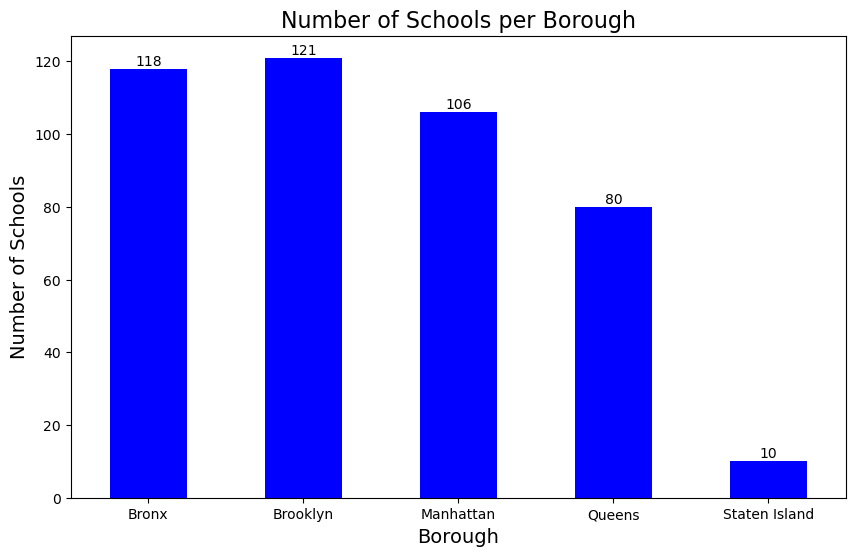

In [20]:
schools_per_borough = df.groupby('borough')['dbn'].nunique()
chart = schools_per_borough.plot(kind='bar', color='blue', figsize=(10, 6))

# Add titles and labels
chart.set_title('Number of Schools per Borough', fontsize=16)
chart.set_xlabel('Borough', fontsize=14)
chart.set_ylabel('Number of Schools', fontsize=14)
plt.xticks(rotation=0)

# Add the values for each bar
for i, value in enumerate(schools_per_borough):
    chart.text(i, value + 1, str(value), ha='center', fontsize=10)

plt.show()

Insights

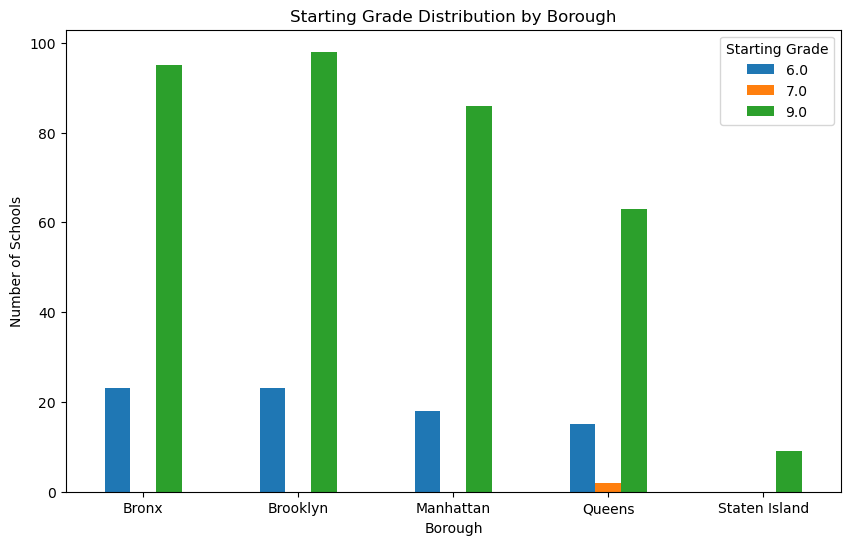

In [24]:
# distribution of starting grades by borough
grade_start_dist = (
    df.groupby(['borough', 'grade_span_min'])['dbn']
      .nunique()
      .unstack(fill_value=0)
)

# Plot
ax = grade_start_dist.plot(kind='bar', stacked=False, figsize=(10,6))
ax.set_title('Starting Grade Distribution by Borough')
ax.set_xlabel('Borough')
ax.set_ylabel('Number of Schools')
ax.legend(title='Starting Grade')
plt.xticks(rotation=0)

plt.show()

Insight: 
- Only a small number of schools in Queens start with Grade 7.
- Staten Island is unique in schools starting with Grade 9.
- Every Borough has a lot more schools starting with Grade 9 than grade 7.

In [26]:
df.groupby('borough').agg(
                         total_students_sum=('total_students', 'sum'),
                         total_students_mean=('total_students', 'mean'),
                            unique_schools=('dbn', 'nunique')
                        ).round(2)

,total_students_sum,total_students_mean,unique_schools
borough,,,
Bronx,57868.0,490.41,118
Brooklyn,83197.0,699.13,121
Manhattan,60752.0,589.83,106
Queens,79545.0,1046.64,80
Staten Island,18475.0,1847.50,10


Insight: 
- Even though Staten Island has the least number of schools it has higher average of students.
- Staten Island school sizes must be bigger than the other Boroughs.